In [ ]:
#I did up to 3.3 but everything deleted last night 
#..once I tried to revert to a checkpoint without the 
#..file being autosaved- as a result I just did the grading portion

In [67]:
import os
os.chdir('/Users/peytonhall/Documents/qbio_490_pbhall/analysis_data')

import cptac

In [68]:
cptac.download(dataset="brca")
brca = cptac.Brca()
brca.list_data()

Below are the dataframes contained in this dataset and their dimensions:

acetylproteomics
	122 rows
	9868 columns
clinical
	122 rows
	18 columns
CNV
	122 rows
	23692 columns
derived_molecular
	122 rows
	36 columns
phosphoproteomics
	122 rows
	38775 columns
proteomics
	122 rows
	10107 columns
somatic_mutation
	24106 rows
	3 columns
transcriptomics
	122 rows
	23121 columns


In [123]:
protein_data = brca.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0)
protein_data

rna_data = brca.get_transcriptomics()
rna_data


In [125]:
clinical_data = brca.get_clinical()
clinical_data

#clinical variable is ethnicity
ethnicity_df = clinical_data[["Ethnicity"]].copy()

black_mask = ethnicity_df['Ethnicity'] == 'black.or.african.american'
black_mask

white_mask = ethnicity_df['Ethnicity'] == 'white'
white_mask

Patient_ID
CPT000814    False
CPT001846     True
X01BR001     False
X01BR008     False
X01BR009     False
             ...  
X21BR001      True
X21BR002      True
X21BR010      True
X22BR005      True
X22BR006     False
Name: Ethnicity, Length: 122, dtype: bool

In [126]:
#rna data
black_rna = rna_data.loc[black_mask, :]
black_rna

white_rna = rna_data.loc[white_mask, :]
white_rna

#protein data 
black_protein = protein_data.loc[black_mask, :]
black_protein

white_protein = protein_data.loc[white_mask, :]
white_protein


Name,A1BG,A2M,A2ML1,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT001846,1.3964,1.3302,-5.0948,0.7674,-1.6845,NaN,2.1022,-0.5814,0.2916,-2.2857,...,-0.7592,0.4711,0.6018,0.2062,-0.2137,-2.1219,0.0860,2.5814,-0.2852,-0.1074
X01BR015,1.0394,-0.1915,-3.4196,0.9185,0.0741,-1.1402,-0.0397,-0.6445,-0.5188,0.6007,...,NaN,-0.4145,-0.3979,-0.5188,0.7026,NaN,-0.0872,1.6941,-1.3442,1.0039
X01BR017,1.1533,2.5655,-0.0396,0.5518,0.0241,NaN,NaN,0.4931,0.4626,-0.2767,...,-0.7202,-0.0600,-0.0702,-0.3276,1.3190,-0.5112,-0.0957,1.0463,-0.4423,0.3606
X01BR018,1.9579,2.4185,1.1549,0.0683,-3.3943,1.1572,NaN,-0.4773,-1.1339,0.4581,...,0.0542,0.2124,-0.6686,0.5360,0.8360,NaN,0.3872,-0.5221,-0.1490,1.3674
X01BR026,2.3407,3.4867,4.7909,-0.2653,-2.6300,NaN,NaN,-0.3030,-0.2250,0.4836,...,0.2977,0.1745,-0.4789,1.6321,-1.5720,0.7299,1.2099,1.7326,0.5188,0.9586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X20BR006,1.5862,1.6519,2.4992,-0.5097,-1.1763,-1.5776,-0.5332,-0.0990,1.3961,0.3376,...,0.0348,0.0301,-0.7937,-0.8242,1.7012,1.6003,-0.0920,-0.6646,-0.0004,-0.9838
X21BR001,-0.6610,-0.6402,-4.8578,1.2319,-1.6491,NaN,NaN,-0.3074,-0.3074,-0.0266,...,-0.2528,0.5090,0.0306,0.4908,-0.5570,2.3864,0.3764,-0.6974,1.3541,1.1123
X21BR002,-1.3735,0.4227,-4.9553,0.6327,-3.1434,NaN,NaN,0.3071,0.7562,-1.6912,...,-3.3351,0.1548,1.0792,-0.6619,-1.4444,-0.3704,0.4909,0.3938,0.2992,-0.3494


In [127]:
#intersect to find similarities
name_intersects = np.intersect1d(black_rna.columns, white_rna.columns)
name_intersects 

black_mean = black_rna[name_intersects].mean()
black_mean

white_mean = white_rna[name_intersects].mean()
white_mean

mean_diff = np.abs(black_mean - white_mean)
mean_diff

Name
A1BG        0.164152
A1BG-AS1    0.037613
A1CF        3.520014
A2M         0.191614
A2ML1       2.025661
              ...   
ZYG11A      0.419881
ZYG11B      0.005105
ZYX         0.353686
ZZEF1       0.478569
ZZZ3        0.204861
Length: 23121, dtype: float64

In [138]:
rna_prot_intersect = np.intersect1d(mean_diff.index, protein_data.columns)

In [141]:
mean_diff[rna_prot_intersect].sort_values(ascending = False)

Name
GNAT3     6.837483
CYP4Z1    5.287959
CSN3      4.851090
CRMP1     4.512530
DNAH17    4.338380
            ...   
TMOD1          NaN
TMSB4Y         NaN
TRPC5          NaN
UNCX           NaN
USP29          NaN
Length: 9570, dtype: float64

In [129]:
black_protein.shape

(14, 10107)

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

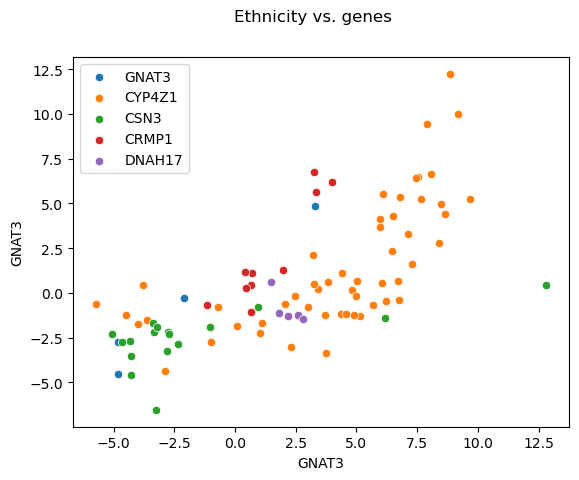

In [142]:
#top genes GNAT3 CYP4Z1 CSN3  CRMP1 DNAH17 
import seaborn as sns
import matplotlib.pyplot as plt

topGenes = ['GNAT3', 'CYP4Z1', 'CSN3', 'CRMP1', 'DNAH17']

fig, ax = plt.subplots()
colors = {'GNAT3':'red', 'CYP4Z1':'orange', 'CSN3':'green', 'CRMP1':'blue', 'DNAH17':'purple'}
for x in topGenes: 
    sns.scatterplot( 
        x = white_rna[x],
        y = white_protein[x],
        label = x,
        legend = "full",  # show the legend
        ax = ax  # necessary for when plotting more than 1 subplot
    )

fig.suptitle('Ethnicity vs. genes')  # set title

plt.show()

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

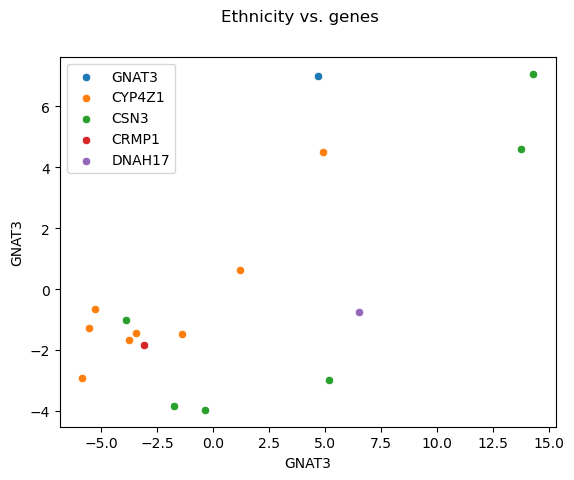

In [143]:
topGenes = ['GNAT3', 'CYP4Z1', 'CSN3', 'CRMP1', 'DNAH17']

fig, ax = plt.subplots()
colors = {'GNAT3':'red', 'CYP4Z1':'orange', 'CSN3':'green', 'CRMP1':'blue', 'DNAH17':'purple'}
for x in topGenes: 
    sns.scatterplot( 
        x = black_rna[x],
        y = black_protein[x],
        label = x,
        legend = "full",  # show the legend
        ax = ax  # necessary for when plotting more than 1 subplot
    )

fig.suptitle('Ethnicity vs. genes')  # set title

plt.show()

In [117]:
x = white_rna[['LOC101927048']]
y = white_protein[['LOC101927048']]

KeyError: "['LOC101927048'] not in index"

In [119]:
white_rna['LOC101927048']

Patient_ID
CPT001846       NaN
X01BR015        NaN
X01BR017        NaN
X01BR018        NaN
X01BR026        NaN
              ...  
X20BR006    -5.5224
X21BR001        NaN
X21BR002        NaN
X21BR010        NaN
X22BR005    -5.5006
Name: LOC101927048, Length: 78, dtype: float64

In [131]:
white_protein['LOC101927048']

KeyError: 'LOC101927048'

In [135]:
white_protein['LOC101927048']

KeyError: 'LOC101927048'

In [ ]:
#What do the numbers within the protein and transcriptomics DataFrames represent? Why do we represent them this way?
The numbers within the protein and transcriptomics DataFrames represent the frequency of the gene/protein within the dataset per patient. 
they are represented this way to easily rank the frequencies of each gene given various clinical data. 

#Why are there fewer columns in the protein DataFrame than the transcriptomics one?
There are fewer columns in the protein DataFrame than the transcriptomics one because within transcriptomics, there may be lots of 
noncoding RNA that needs to be accounted for. 
#Explain how the central dogma may be broken in between DNA -> RNA -> Proteins and how this might affect our proteomics data.
The central dogma may be broken in that there are noncoding DNA and RNA regions, which may lead to different counts among the three. 
Furthermore, there may be missing data. This may affect proteomics data in that a protein may be difficult to trace back to an RNA 
sequence. 
#Why is proteomics data relatively scarce compared to sequencing data?
protein data depends on translation of rna, but not all of the rna that encodes for proteins may be included in the dataset
and the dataset may also include noncoding rna in addition to the coding rna 
#Should we ever expect protein expression to be 0 in a tumor sample?
no, there should be protein expression because cancerous cells change the expression of certain proteins, thus proteins being 
good biomarkers of tumor growth. 
#What are protein domains and how do they relate to the role of a protein?
protein domains describe homologous regions of self folding proteins, forming a compact three dimensional figure. Protein domains relate to
the role of a protein in that the domains are responsible for a particular function, contributing the the protein specific function or role. 
#Overexpression of the ERBB2 gene is found in up to 20% of breast cancer cases. ERBB2 encodes the receptor tyrosine-protein kinase erbB-2, frequently called HER2 in humans. Thus, cases in which ERBB2 is overexpressed are referred to as HER2+. Briefly skim the following paper and answer the following questions.
    #Is ERBB2 an oncogene or a tumor suppressor gene? How do mutations within the gene affect the prognosis of the disease?
    Her2 is an oncogene. Mutations within the gene affect the disease prognosis via overexpression, leading to cell proliferation, migration, invasion,
    and survival. 

    #What are some treatment strategies for HER2+ breast cancer?
    Some treatment strategies 
    - trastuzumab, which targets the extracellular
    domain of HER2 thus altering the normal tyrosine kinase signaling
    - anti-HER2 therapy

    #What is one recent development that has changed our understanding of HER2+ breast cancer?
    - NSABP B-47 trial has recently demonstrated that HER2-negative carcinomas (score 1+/2+ in IHC and ISH-negative) do
    not benefit from the addition of trastuzumab
    - patients with HER2 heterogeneity seem to be less responsive to anti-HER2 targeted therapy 
    and also demonstrated by lower achievement of pathologic complete response (pCR) following 
    neoadjuvant treatment with trastuzumab-containing chemotherapy
    - PAM50-defined HER2-enriched intrinsic subtype was significantly associated with
    high HER2 mRNA levels and higher pCR rate compared to other subtypes
    

    